# Adnan Altukleh Abdullkarim Dawaibi Assignment 1

In [6444]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score,roc_auc_score

columns name for the data

In [6445]:
colname=["word_freq_make",
"word_freq_address",
"word_freq_all",
"word_freq_3d",
"word_freq_our",
"word_freq_over",
"word_freq_remove",
"word_freq_internet",
"word_freq_orders",
"word_freq_mail",
"word_freq_receive",
"word_freq_will",
"word_freq_people",
"word_freq_report",
"word_freq_addresses",
"word_freq_free",
"word_freq_business",
"word_freq_email",
"word_freq_you",
"word_freq_credit",
"word_freq_your",
"word_freq_font",
"word_freq_000",
"word_freq_money",
"word_freq_hp",
"word_freq_hpl",
"word_freq_george",
"word_freq_650",
"word_freq_lab",
"word_freq_labs",
"word_freq_telnet",
"word_freq_857",
"word_freq_data",
"word_freq_415",
"word_freq_85",
"word_freq_technology",
"word_freq_1999",
"word_freq_parts",
"word_freq_pm",
"word_freq_direct",
"word_freq_cs",
"word_freq_meeting",
"word_freq_original",
"word_freq_project",
"word_freq_re",
"word_freq_edu",
"word_freq_table",
"word_freq_conference",
"char_freq_",
"char_freq_(",
"char_freq_[",
"char_freq_!",
"char_freq_$", 
"char_freq_#",
"capital_run_length_average",
"capital_run_length_longest",
"capital_run_length_total",
"is_spam"]

In [6446]:
#selecting continuous real [0,100] attributes 
colprocent=colname[:-4]

In [6447]:
#data reading
data=pd.read_csv("spambase.csv",names=colname)

In [6448]:
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_orders,word_freq_mail,...,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6449]:
#checking for duplicates
data.duplicated().sum()

391

In [6450]:
#selecting duplicated instances
data.loc[data.duplicated()]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_orders,word_freq_mail,...,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


we can see that we have multiple rows that are identical, that maight affect the result of the algorithm, that why we will delete them

In [6451]:
#droping duplicated instances
data=data.drop_duplicates()

In [6452]:
#checking if there is any value that under 0
for i in colname:
    print(data.loc[(data[i]<0)].sum())

word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_orders              0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab                 0.0
word_freq_labs

In [6453]:
#checking if any null values exist
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_orders              0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [6454]:
#checking if there are any value that is more that 100
for i in colprocent:
    print((data.loc[data[i]>100]).sum())

word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_orders              0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab                 0.0
word_freq_labs

_____________________________________________________________________

### Binning process

In [6455]:
#analyse process
for i in colname:
    print(f"maxvalue of {i} is: {data[i].max()}, median is {data[i].median()}, min is {data[i].min()} and mean is {data[i].mean()}")



maxvalue of word_freq_make is: 4.54, median is 0.0, min is 0.0 and mean is 0.10436579572446555
maxvalue of word_freq_address is: 14.28, median is 0.0, min is 0.0 and mean is 0.11265558194774346
maxvalue of word_freq_all is: 5.1, median is 0.0, min is 0.0 and mean is 0.2914726840855107
maxvalue of word_freq_3d is: 42.81, median is 0.0, min is 0.0 and mean is 0.06307838479809977
maxvalue of word_freq_our is: 10.0, median is 0.0, min is 0.0 and mean is 0.3253206650831354
maxvalue of word_freq_over is: 5.88, median is 0.0, min is 0.0 and mean is 0.09665558194774347
maxvalue of word_freq_remove is: 7.27, median is 0.0, min is 0.0 and mean is 0.1174750593824228
maxvalue of word_freq_internet is: 11.11, median is 0.0, min is 0.0 and mean is 0.10799999999999998
maxvalue of word_freq_orders is: 5.26, median is 0.0, min is 0.0 and mean is 0.09185985748218528
maxvalue of word_freq_mail is: 18.18, median is 0.0, min is 0.0 and mean is 0.2484204275534442
maxvalue of word_freq_receive is: 2.61, medi

In [6456]:
#number of bins
n_bin=8

In [6457]:
#data discretization 
dtrans=KBinsDiscretizer(n_bins=n_bin,encode="ordinal",strategy="kmeans")

In [6458]:
#deleting the "is_spam" column
data_list=data.values.tolist()
data_list=np.array(data_list).T.tolist()
is_spam_col=data_list[-1]
data_list=np.delete(data_list,-1,0)
data_list=np.array(data_list).T.tolist()

In [6459]:
#fiting data
dtrans.fit(data_list)

KBinsDiscretizer(encode='ordinal', n_bins=8, strategy='kmeans')

In [6460]:
#transform data and create a copy of DF
trans_data=dtrans.transform(data_list)
trans_data1=trans_data
trans_data1

array([[0., 2., 2., ..., 0., 1., 0.],
       [1., 1., 2., ..., 0., 1., 2.],
       [0., 0., 2., ..., 1., 3., 3.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.]])

____________________________________________________

### instans space, hypotiesies and conjective concept

number of instans space, what is the number of possibilities of the tranining examples that you can have. to count that we measur for each attributs how many values can have, ex word_freq_make can have 1,2,3 and 5 values so it have 4 diffirent possible values and we do that for all attributs in the end we multiblai all diffirent possible values for each attribut ex     
* "word_freq_make" have = 4
* "word_freq_address" have = 3
* "word_freq_all" have = 5
the number of instans space will be 4x3x5=60



the conjective concept will be ex:

* "word_freq_make" have = 4 + 1 for null = 5
* "word_freq_address" have = 3 + 1 for null = 4
* "word_freq_all" have = 5 + 1 for null = 6
* the number of conjectiv concept will be 5x4x6= 121

hypotiesies space the number of possible extensions = number of output classes which is 2 power the instans space

In [6461]:
trans_data=np.array(trans_data).T.tolist()

In [6462]:
uniq1=[]
for i in trans_data:
    col=len(np.unique(i))
    uniq1.append(col)

In [6463]:
ins_spac=math.prod(uniq1)
ins_spac

2993155353253689176481146537402947624255349848014848

In [6464]:
hyp_space=2^ins_spac

In [6465]:
def conjective(lList):
    result = 1
    for x in lList:
        result = result * (x+1)
    return result

In [6466]:
conjcon=conjective(uniq1)
conjcon

2465034704958067503996131453373943813074726512397600969

_____________________________________________

### Algorithm 4.1 and 4.2

In [6467]:
#creating data frame of the discrete data excluding the "is_spam" column
trans_df=pd.DataFrame(trans_data1,columns=colname[0:-1:])

In [6468]:
trans_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_orders,word_freq_mail,...,word_freq_conference,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0
2,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4207,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4208,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6469]:
#added back the column "is_spam" after discrete the data
trans_df["is_spam"]=is_spam_col

In [6470]:
#selecting instances that are classified as spam
is_spam_1=trans_df.loc[trans_df["is_spam"]==1]
is_spam_1= is_spam_1.iloc[:,:-1]
is_spam_1

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_orders,word_freq_mail,...,word_freq_conference,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0
2,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1676,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0
1677,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6471]:
#checking which unique values each column have 
uniq=[]
for i in colname:
    uniq.append(trans_df[i].unique())
uniq

[array([0., 1., 3., 2., 4., 7., 5., 6.]),
 array([2., 1., 0., 3., 4., 5., 7., 6.]),
 array([2., 0., 1., 4., 5., 3., 6., 7.]),
 array([0., 1., 2., 3., 4., 7., 5., 6.]),
 array([1., 0., 2., 3., 4., 5., 6., 7.]),
 array([0., 1., 3., 2., 5., 4., 7., 6.]),
 array([0., 1., 2., 3., 4., 6., 5., 7.]),
 array([0., 2., 3., 1., 4., 5., 6., 7.]),
 array([0., 2., 1., 3., 6., 4., 5., 7.]),
 array([0., 2., 1., 3., 4., 5., 7., 6.]),
 array([0., 1., 2., 4., 3., 5., 6., 7.]),
 array([1., 0., 2., 3., 4., 6., 5., 7.]),
 array([0., 2., 1., 3., 4., 7., 6., 5.]),
 array([0., 1., 3., 6., 4., 2., 5., 7.]),
 array([0., 1., 4., 3., 5., 2., 7., 6.]),
 array([0., 1., 4., 2., 3., 5., 6., 7.]),
 array([0., 1., 2., 6., 3., 4., 5., 7.]),
 array([2., 0., 1., 3., 4., 5., 7., 6.]),
 array([2., 3., 1., 0., 4., 5., 6., 7.]),
 array([0., 1., 5., 2., 6., 4., 3., 7.]),
 array([1., 2., 0., 3., 4., 5., 6., 7.]),
 array([0., 4., 3., 2., 1., 7., 5., 6.]),
 array([0., 1., 2., 3., 4., 5., 7., 6.]),
 array([0., 1., 2., 7., 4., 3., 5.

In [6472]:
#creating train data and test data
train_data=is_spam_1.sample(int(0.80*len(is_spam_1)))
#trans_df.loc[trans_df.index.isin(train_data.index)]
t_df=trans_df.drop(train_data.index)
test_nonspam=t_df.loc[t_df["is_spam"]==0].head(int(0.20*len(is_spam_1)))
test_spam=t_df.loc[t_df["is_spam"]==1]
test_data=test_nonspam.append(test_spam,ignore_index=False)
test_data

C:\Users\adnan\AppData\Local\Temp\ipykernel_18996\4213335928.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data=test_nonspam.append(test_spam,ignore_index=False)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_orders,word_freq_mail,...,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0
1659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0
1661,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1667,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6473]:
#4.2 algorithm
def lgg(x,y):
    for index in range(len(x)-1):
        if x[index]==-1:
            y[index]=-1
        if x[index]!=y[index]:
            y[index]=-1
    return y

In [6474]:
#4.1 algorithm
def lgg_set(df):
    n_row=df.iloc[0]
    H=n_row
    for instans in range((len(df)-1)):
        n_row=df.iloc[instans+1]
        H=lgg(H,n_row)
    return H

In [6475]:
#train the model with train data
H=lgg_set(train_data)
H

word_freq_make               -1.0
word_freq_address            -1.0
word_freq_all                -1.0
word_freq_3d                 -1.0
word_freq_our                -1.0
word_freq_over               -1.0
word_freq_remove             -1.0
word_freq_internet           -1.0
word_freq_orders             -1.0
word_freq_mail               -1.0
word_freq_receive            -1.0
word_freq_will               -1.0
word_freq_people             -1.0
word_freq_report             -1.0
word_freq_addresses          -1.0
word_freq_free               -1.0
word_freq_business           -1.0
word_freq_email              -1.0
word_freq_you                -1.0
word_freq_credit             -1.0
word_freq_your               -1.0
word_freq_font               -1.0
word_freq_000                -1.0
word_freq_money              -1.0
word_freq_hp                 -1.0
word_freq_hpl                -1.0
word_freq_george             -1.0
word_freq_650                -1.0
word_freq_lab                -1.0
word_freq_labs

In [6476]:
#number of the common features
(H.values!=-1).sum()

2

In [6477]:
#deleting is_spam column from test data
is_spam=test_data["is_spam"].to_list()
test_data=test_data.iloc[:,:-1]


In [6478]:
#testing the model based on the trained data
match_rows=[]
for v,index in zip(test_data.values,test_data.index):
    k=0
    for i,h in zip(v,H.values):
        if h==-1:
            k+=1
        else:
            if h==i:
                k+=1
    if k == test_data.shape[1]-1:
        match_rows.append(index)

In [6479]:
#number of the predicted instances as spam mail from the test data
len(match_rows)

196

In [6480]:
#putting back the spam column
test_data["is_spam"]=is_spam

In [6481]:
# #selecting the matched instances
# df_clasfid=test_data.loc[test_data.index.isin(match_rows)]
# df_clasfid

In [6482]:
#creating a predicted column with a default value as 0
test_data["predicted"]=0

In [6483]:
#classify the predicted spam mail by giving a value of 1
test_data["predicted"][match_rows]=1

C:\Users\adnan\AppData\Local\Temp\ipykernel_18996\1967850027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["predicted"][match_rows]=1


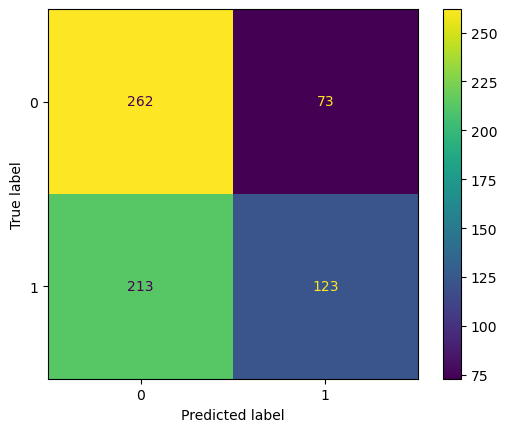

In [6484]:
#computing confusion matrix
cm=confusion_matrix(test_data["is_spam"],test_data["predicted"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [6485]:
#computing accuracy score
accuracy_score(test_data["is_spam"],test_data["predicted"])

0.5737704918032787

In [6486]:
#computing percision score
precision_score(test_data["is_spam"],test_data["predicted"])

0.6275510204081632